In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from collections import deque
import scipy.stats as s 

In [ ]:
# Data import
tickers_list = ['MGC=F', 'SIL=F', 'CL=F', 'NG=F', 'ZL=F', 'HG=F']
tickers_list_length = len(tickers_list)

data = yf.download(tickers=tickers_list, period="2y", interval="1h").reset_index(drop=True)
data.tail()

In [ ]:
# Forward fill NULL values with the average of the last 5 values, and drop the first few NaN rows

Adj_Closed = data['Adj Close'][:].fillna(method = "ffill", limit = 5).dropna()
High = data['High'][:].fillna(method = "ffill", limit = 5).dropna()
Low = data['Low'][:].fillna(method = "ffill", limit = 5).dropna()

In [ ]:
High['CL=F'].index.max()

In [40]:
def create_linear_models(data, window_size=50):
    models = []
    coords = []
    y_vals = []

    for i in range(0, len(data), window_size):
        x = data.index[i:i+window_size] 
        y = data[i:i+window_size]
        
        slope, intercept, r_value, p_value, std_err = s.linregress(x, y)
        
        models.append((slope, intercept, r_value**2))
        
        for j in x:
            y = slope*j + intercept   
            y_vals.append(y)
        coords.append((x, y_vals))
        
    return models, coords

_, coords_midCL = create_linear_models(Adj_Closed['CL=F'])
_, coords_topCL = create_linear_models(High['CL=F'])
_, coords_botCL = create_linear_models(Low['CL=F'])

_, coords_midMGC = create_linear_models(Adj_Closed['MGC=F'])
_, coords_topMGC = create_linear_models(High['MGC=F'])
_, coords_botMGC = create_linear_models(Low['MGC=F'])

_, coords_midSIL = create_linear_models(Adj_Closed['SIL=F'])
_, coords_topSIL = create_linear_models(High['SIL=F'])
_, coords_botSIL = create_linear_models(Low['SIL=F'])

_, coords_midNG = create_linear_models(Adj_Closed['NG=F'])
_, coords_topNG = create_linear_models(High['NG=F'])
_, coords_botNG = create_linear_models(Low['NG=F'])

_, coords_midZL = create_linear_models(Adj_Closed['ZL=F'])
_, coords_topZL = create_linear_models(High['ZL=F'])
_, coords_botZL = create_linear_models(Low['ZL=F'])

_, coords_midHG = create_linear_models(Adj_Closed['HG=F'])
_, coords_topHG = create_linear_models(High['HG=F'])
_, coords_botHG = create_linear_models(Low['HG=F'])

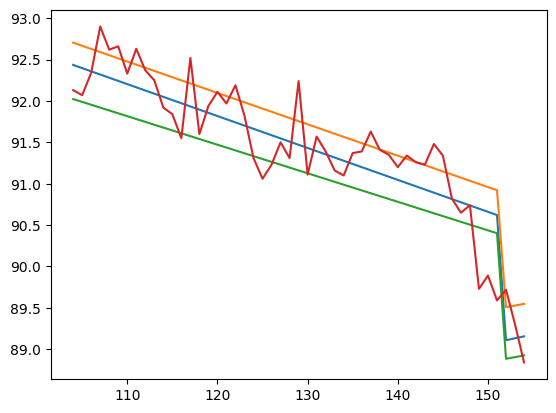

In [50]:
# fig = plt.figure()
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
# (ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
# fig.suptitle('Sharing x per column, y per row')
# ax1.plot(Adj_Closed['CL=F'][102:153].index, coords_midCL[1][1][102:153], label = "LR Mid")
# ax1.plot(Adj_Closed['CL=F'][102:153].index, coords_topCL[1][1][102:153], label = "LR Top")
# ax1.plot(Adj_Closed['CL=F'][102:153].index, coords_botCL[1][1][102:153], label = "LR Bot")
# ax1.plot(Adj_Closed['CL=F'][102:153].index, Adj_Closed['CL=F'][102:153], label = "Adj Close")

# ax2.plot(Adj_Closed['CL=F'][102:153].index, coords_midMGC[1][1][102:153], label = "LR Mid")
# ax2.plot(Adj_Closed['CL=F'][102:153].index, coords_topMGC[1][1][102:153], label = "LR Top")
# ax2.plot(Adj_Closed['CL=F'][102:153].index, coords_botMGC[1][1][102:153], label = "LR Bot")
# ax2.plot(Adj_Closed['CL=F'][102:153].index, Adj_Closed['CL=F'][102:153], label = "Adj Close")

# for ax in fig.get_axes():
#     ax.label_outer()

plt.plot(Adj_Closed['CL=F'][102:153].index, coords_midCL[1][1][102:153], label = "LR Mid")
plt.plot(Adj_Closed['CL=F'][102:153].index, coords_topCL[1][1][102:153], label = "LR Top")
plt.plot(Adj_Closed['CL=F'][102:153].index, coords_botCL[1][1][102:153], label = "LR Bot")
plt.plot(Adj_Closed['CL=F'][102:153].index, Adj_Closed['CL=F'][102:153], label = "Adj Close")
